# Day 4


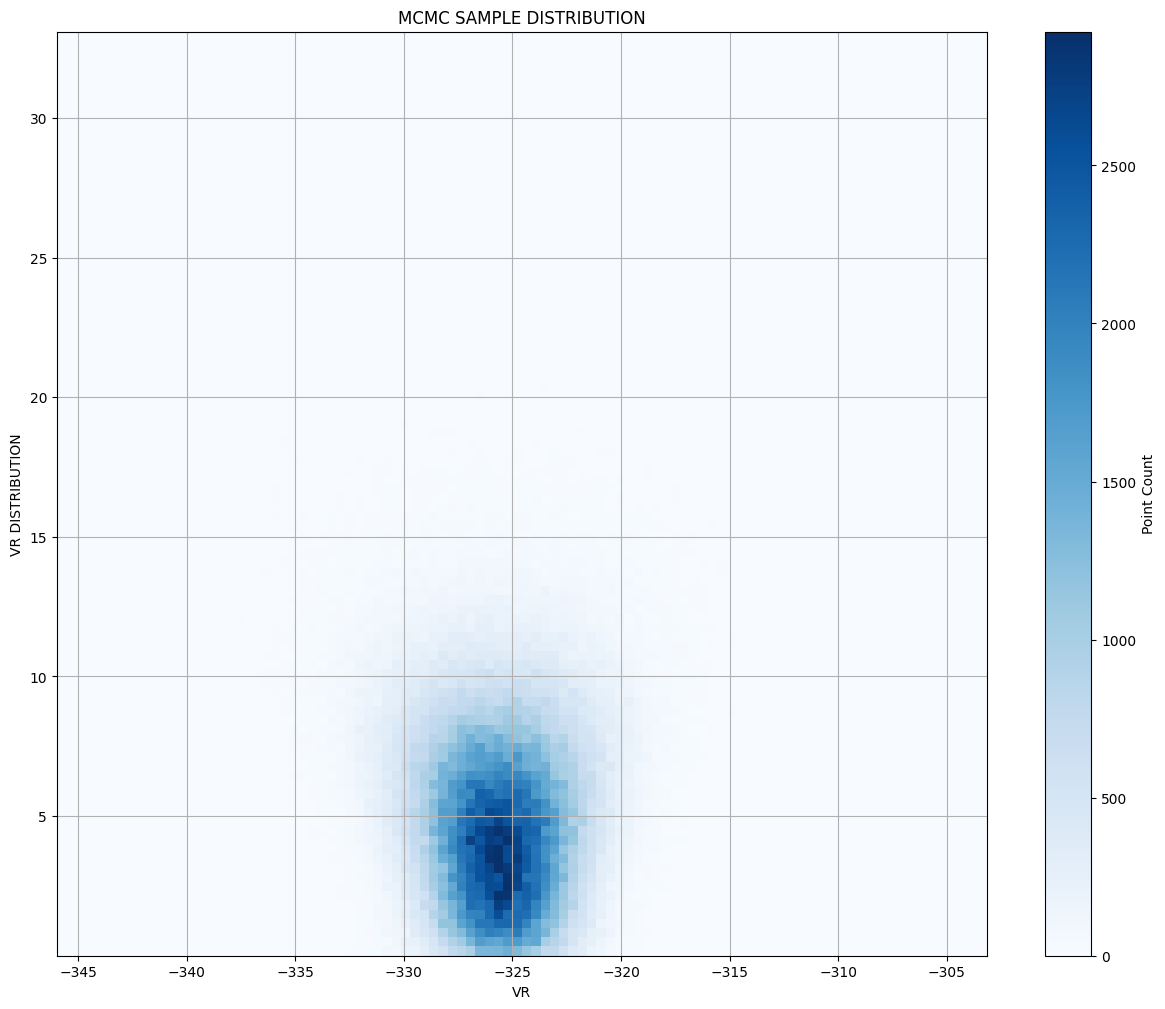

acceptance rate:  0.348386


In [16]:
#1. get the MCMC chain

import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter
import pandas as pd

def likelihood(v, vr, delta, sigma):
    sigmavi=(sigma**2+delta**2)**0.5
    lnL= -0.5*(np.log(2*np.pi))-np.log(sigmavi)-0.5*((v-vr)**2/sigmavi**2)
    return lnL

vr=-330
sigma=6
vr_zero=vr
sigma_zero=sigma
s1=8
s2=1
a=0
vr_data=[]
sigma_data=[]
likelihood_data=[]
number_data=[]
vr_dia=[]
sigma_dia=[]

v= [-344.73,-323.98,-319.18,-327.82,-321.96,-313.30,-334.14,-333.23,-321.67,-314.25,-330.85,-326.63]
delta= [8.61,7.05,6.66,6.37,8.01,7.18,7.17,6.8,7.19,6.73,7.17,7.07]

plt.figure(figsize=(15, 12))

for i in range(1000000):
    vr_temp=np.random.normal(loc=vr, scale=s1)
    sigma_temp=np.random.normal(loc=sigma, scale=s2)
    if (sigma_temp<0):
        continue
    likelihood_value0=likelihood_value1=0
    for ii in range(12):    
        likelihood_value0=likelihood_value0+likelihood(v[ii],vr,delta[ii],sigma)
    for ii in range(12):    
        likelihood_value1=likelihood_value1+likelihood(v[ii],vr_temp,delta[ii],sigma_temp)
    vr_data.append(vr)
    sigma_data.append(sigma)
    likelihood_data.append(likelihood_value0)
    number_data.append(a)
    if np.exp(likelihood_value1-likelihood_value0)>1:
        vr=vr_temp
        sigma=sigma_temp
        a=a+1
    else:
        num = random.uniform(0, 1)
        if np.exp(likelihood_value1-likelihood_value0)>num:
            vr=vr_temp
            sigma=sigma_temp
            a=a+1

plt.hist2d(vr_data, sigma_data, bins=100, cmap='Blues')

# 添加颜色条
plt.colorbar(label='Point Count')

# 设置标题和坐标轴
plt.title("MCMC SAMPLE DISTRIBUTION")
plt.xlabel("VR")
plt.ylabel("VR DISTRIBUTION")

plt.grid(True)
plt.show()

# 链导出部分
df = pd.DataFrame({
    '列1': number_data,
    '列2': vr_data,
    '列3': sigma_data,
    '列4': likelihood_data
})

# 导出为 CSV 文件
df.to_csv('output_new.csv', index=False, encoding='utf-8')
print("acceptance rate: ",a/1000000)

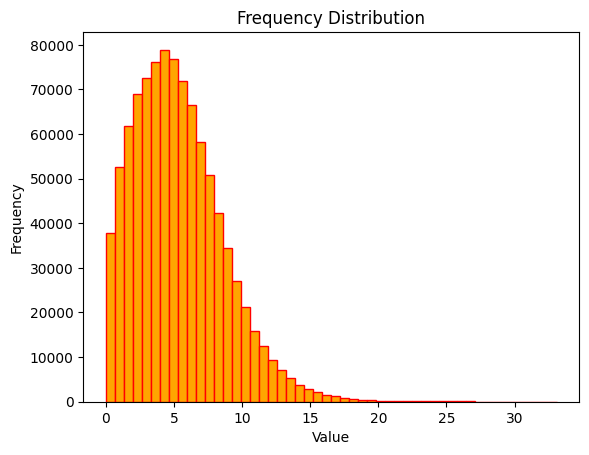

In [ ]:
#2. get the distribution of sigma

import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV 文件
df = pd.read_csv('output_new.csv')

# 转换为二维数组（NumPy 数组）
array = df.values  # 或者 df.to_numpy()

sigma_datas=array[:,2]



plt.figure(2)
plt.hist(sigma_datas, bins=50, edgecolor='red',color="orange")  # bins 是柱子数量
plt.title('Frequency Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')


plt.show()

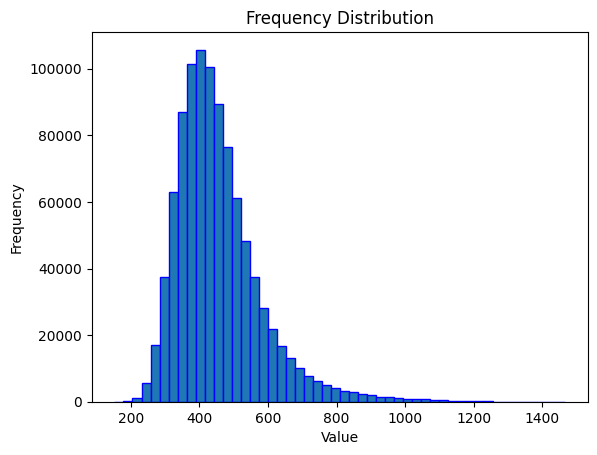

In [ ]:
#3. get the distribution of rh(pc)

import pandas as pd
import matplotlib.pyplot as plt

rh = np.loadtxt('PerI_rh_chain.txt', dtype=float)
df = pd.read_csv('output_new.csv')
array = df.values
sigma_datas=array[:,2]

mu    = 24.49      # 均值
sigma = 0.18    # 标准差
size  = len(sigma_datas)  # 样本量
nius = np.random.normal(loc=mu, scale=sigma, size=size)


P=[0.0]*len(sigma_datas)
for i in range(len(sigma_datas)):
    P[i] = (10 ** ((nius[i] + 5) / 5)) * np.sin(np.radians(rh[i] / 60.0))


# 绘制频率分布柱状图（直方图）
plt.figure(1)
plt.hist(P, bins=50, edgecolor='blue')  # bins 是柱子数量
plt.title('Frequency Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')


plt.show()

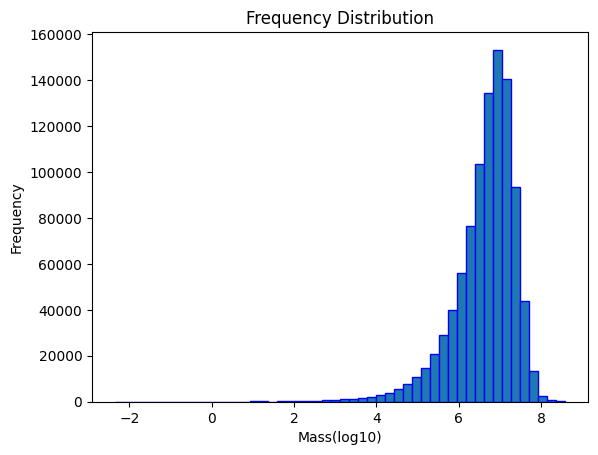

In [ ]:
#4. use the formula to calculate the distribution of M, figuring out if there is dark matter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


PM=[0.0]*len(sigma_datas)
for i in range (len(sigma_datas)):
    PM[i]=np.log10(580*P[i]*(sigma_datas[i]**2))


plt.figure(1)
plt.hist(PM, bins=50, edgecolor='blue')  # bins 是柱子数量
plt.title('Frequency Distribution')
plt.xlabel('Mass(log10)')
plt.ylabel('Frequency')


plt.show()

# The peak is around 10e7, about 10 times larger than stellar mass (but is not very accurate), interpreting that there might be dark matters in this galaxy.